In [1]:
import os
os.chdir('../..')
os.getcwd()

'D:\\StockMaster'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [404]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler

In [535]:
import pandas_datareader as pdr
df= pdr.get_data_yahoo('AAPL', '2000-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,3.674107,3.553571,3.604911,3.671875,40952800.0,3.178732
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,3.460857
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,3.169071
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,3.215448
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.937188
...,...,...,...,...,...,...
2020-07-06,375.779999,369.869995,370.000000,373.850006,29663900.0,373.850006
2020-07-07,378.619995,372.230011,375.410004,372.690002,28106100.0,372.690002
2020-07-08,381.500000,376.359985,376.720001,381.369995,29273000.0,381.369995


In [ ]:
def nplog(dataframe):
    
    temp = np.log(dataframe)
    
    return temp

In [527]:
log_df = nplog(df)
log_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,1.301310,1.267953,1.282297,1.300702,17.527931,1.156482
2000-01-03,1.390749,1.289700,1.320565,1.385736,18.712971,1.241516
2000-01-04,1.373942,1.284771,1.352239,1.297658,18.668278,1.153439
2000-01-05,1.373376,1.302524,1.309780,1.312186,19.086356,1.167967
2000-01-06,1.340624,1.221672,1.332413,1.221672,19.072971,1.077453
...,...,...,...,...,...,...
2020-07-06,5.929004,5.913152,5.913503,5.923855,17.205441,5.923855
2020-07-07,5.936533,5.919512,5.928019,5.920747,17.151497,5.920747
2020-07-08,5.944111,5.930546,5.931502,5.943770,17.192176,5.943770


In [488]:
# scaler = MinMaxScaler()

In [536]:
def get_indicators(dataframe, *indicators):
    
    from Indicator import get_Bolinger_Band
    from Indicator import get_DMI
    from Indicator import get_MACD
    from Indicator import get_RSI
    
    

    BAND = get_Bolinger_Band.fnBolingerBand
    DMI = get_DMI.cal_dmi
    MACD = get_MACD.fnMACD
    RSI = get_RSI.fnRSI
    
    
    for indicator in indicators:
        
        if indicator == 'DMI':
            DMI(dataframe)
        elif indicator == 'MACD':
            MACD(dataframe)
        elif indicator == 'RSI':
            RSI(dataframe)
        elif indicator == 'BAND':
            BAND(dataframe)
    
    dataframe.dropna(inplace=True)
#     data = pd.DataFrame(scaler.fit_transform(dataframe), columns = dataframe.columns)
#     data.index = dataframe.index
    
        
    return dataframe
        
    

In [537]:
log_df = get_indicators(log_df, 'DMI', 'RSI', 'MACD', 'BAND')
log_df

,High,Low,Open,Close,Volume,Adj Close,PDI,MDI,ADX,RSI_MACD,EMAFast,EMASlow,MACD,MACDSignal,MACDDiff,20d_ma,Bol_upper,Bol_lower
Date,,,,,,,,,,,,,,,,,,
2000-02-17,1.417066,1.396289,1.414357,1.411640,18.097363,1.267420,0.241554,0.213536,0.141414,0.557560,1.380367,1.345387,0.034980,0.029737,0.005243,1.363962,1.468995,1.258929
2000-02-18,1.415983,1.376199,1.409461,1.379575,17.882148,1.235356,0.215768,0.244648,0.130841,0.567158,1.390247,1.354761,0.035486,0.030372,0.005114,1.363934,1.468949,1.258918
2000-02-22,1.429435,1.337700,1.369412,1.402348,18.474923,1.258128,0.168040,0.283364,0.147571,0.587469,1.398313,1.361008,0.037305,0.031393,0.005913,1.367372,1.472706,1.262038
2000-02-23,1.446919,1.377326,1.397255,1.423539,18.588521,1.279319,0.181535,0.237398,0.145664,0.612825,1.404447,1.366631,0.037816,0.031956,0.005860,1.369122,1.477068,1.261176
2000-02-24,1.447969,1.384060,1.432637,1.414492,18.359954,1.270272,0.157318,0.202578,0.142996,0.621628,1.405276,1.370589,0.034687,0.032505,0.002182,1.371348,1.481187,1.261509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,5.929004,5.913152,5.913503,5.923855,17.205441,5.923855,0.310796,0.123599,0.313196,0.647224,5.889181,5.848869,0.040312,0.043683,-0.003371,5.869628,5.932678,5.806579
2020-07-07,5.936533,5.919512,5.928019,5.920747,17.151497,5.920747,0.323394,0.111762,0.336282,0.655517,5.894004,5.854980,0.039025,0.042956,-0.003931,5.875190,5.935477,5.814902
2020-07-08,5.944111,5.930546,5.931502,5.943770,17.192176,5.943770,0.323519,0.097043,0.363245,0.673166,5.901224,5.861506,0.039718,0.042168,-0.002449,5.880348,5.945624,5.815071


In [538]:
def make_sc_col_df(train_scdf):
    for i in train_scdf.columns:
        globals()['scaler_{}'.format(i)] = MinMaxScaler()
        print("df_{}".format(i))
        globals()["df_{}".format(i)] = train_scdf[[i]]
        globals()["df_{}".format(i)] = globals()['scaler_{}'.format(i)].fit_transform(globals()["df_{}".format(i)])
        globals()["df_{}".format(i)] = pd.DataFrame(globals()["df_{}".format(i)])
        globals()["df_{}".format(i)].index = train_scdf.index
        globals()["df_{}".format(i)].columns = [i]

    return globals()["df_{}".format(i)]

In [492]:
scaler_Close

MinMaxScaler(copy=True, feature_range=(0, 1))

In [539]:
make_sc_col_df(df)

df_High
df_Low
df_Open
df_Close
df_Volume
df_Adj Close


,Adj Close
Date,
1999-12-31,0.006183
2000-01-03,0.006920
2000-01-04,0.006158
2000-01-05,0.006279
2000-01-06,0.005553
...,...
2020-07-06,0.974325
2020-07-07,0.971296
2020-07-08,0.993967


In [540]:
y_scaler = MinMaxScaler()
y_scale = pd.DataFrame(y_scaler.fit_transform(df_Close.values.reshape(-1,1)))
y_scale.columns = ['Close']

In [562]:
df_Close

,Close
Date,
1999-12-31,0.007145
2000-01-03,0.007997
2000-01-04,0.007116
2000-01-05,0.007256
2000-01-06,0.006416
...,...
2020-07-06,0.974317
2020-07-07,0.971286
2020-07-08,0.993965


In [542]:
def shift_df(*dataframes, start=1, end=3):  
    shift_num = end
    for dataframe in dataframes:
        for s in range(start, end):
            dataframe['shift_{}'.format(s)] = dataframe[dataframe.columns[0]].shift(s)
        dataframe.dropna(inplace=True)
    return dataframe

In [543]:
shift_df(y_scale)

,Close,shift_1,shift_2
2,0.007116,0.007997,0.007145
3,0.007256,0.007116,0.007997
4,0.006416,0.007256,0.007116
5,0.006836,0.006416,0.007256
6,0.006673,0.006836,0.006416
...,...,...,...
5159,0.974317,0.948869,0.948869
5160,0.971286,0.974317,0.948869
5161,0.993965,0.971286,0.974317
5162,0.998250,0.993965,0.971286


In [544]:
def df_concat(*dataframes):
    all_Df =  pd.concat([*dataframes], axis=1)
    all_Df.dropna(inplace=True)
    return all_Df

In [545]:
all_df = df_concat(df_MDI, df_PDI, df_Close)

In [546]:
def drop_ori_cols(all_df):
    col_list = []
    for i in all_df.columns:
        if 'shift' in i:
            pass
        elif 'Close' in i:
            pass
        else:
            col_list.append(i)
    all_df.drop(col_list, axis=1, inplace=True)
    
    return all_df



In [547]:
all_df = drop_ori_cols(y_scale)
all_df

,Close,shift_1,shift_2
2,0.007116,0.007997,0.007145
3,0.007256,0.007116,0.007997
4,0.006416,0.007256,0.007116
5,0.006836,0.006416,0.007256
6,0.006673,0.006836,0.006416
...,...,...,...
5159,0.974317,0.948869,0.948869
5160,0.971286,0.974317,0.948869
5161,0.993965,0.971286,0.974317
5162,0.998250,0.993965,0.971286


In [548]:
def set_split(all_df, num=1, xnum=200):
    xdata = all_df.drop('Close', axis=1)[:-num]
    ydata = all_df['Close'][num:].values
    
    x_train = xdata[:-xnum]
    x_test = xdata[-xnum:]

    ytrain = ydata[:-xnum]
    ytest = ydata[-xnum:]
    
    shift_num = 2
    x_train = np.array(x_train).reshape(len(x_train), int(len(x_train.columns)/shift_num), shift_num)
    x_test = np.array(x_test).reshape(len(x_test), int(len(x_test.columns)/shift_num), shift_num)

    
    return x_train, x_test, ytrain, ytest

In [549]:
x_train, x_test, y_train, y_test = set_split(all_df)

In [550]:
def LSTMmodel():
    from tensorflow.keras.layers import LSTM 
    from tensorflow.keras.models import Sequential 
    from tensorflow.keras.layers import Dense 
    import tensorflow.keras.backend as K 
    from tensorflow.keras.callbacks import EarlyStopping


    model3 = Sequential() # Sequeatial Model 
    model3.add(LSTM(20, input_shape=(x_train.shape[1], x_train.shape[2]))) # (timestep, feature) 
    model3.add(Dense(1)) # output = 1 
    model3.compile(loss='mean_squared_error', optimizer='adam') 
    model3.summary()
    
    return model3

In [551]:
model = LSTMmodel()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 20)                1840      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 21        
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


In [552]:
model.fit(x_train, y_train, epochs=10, batch_size=30, verbose=1)

Epoch 1/10
4961/4961 [==============================] - 2s 377us/sample - loss: 0.0167
Epoch 2/10
4961/4961 [==============================] - 0s 76us/sample - loss: 0.0014
Epoch 3/10
4961/4961 [==============================] - 0s 78us/sample - loss: 5.1671e-05
Epoch 4/10
4961/4961 [==============================] - 0s 81us/sample - loss: 4.8129e-05
Epoch 5/10
4961/4961 [==============================] - 0s 82us/sample - loss: 4.5086e-05
Epoch 6/10
4961/4961 [==============================] - 0s 79us/sample - loss: 4.1972e-05
Epoch 7/10
4961/4961 [==============================] - 0s 74us/sample - loss: 3.9165e-05
Epoch 8/10
4961/4961 [==============================] - 0s 69us/sample - loss: 3.6956e-05
Epoch 9/10
4961/4961 [==============================] - 0s 64us/sample - loss: 3.4813e-05
Epoch 10/10
4961/4961 [==============================] - 0s 63us/sample - loss: 3.3284e-05


In [553]:
pred = pd.DataFrame(model.predict(x_test), columns = ['pred'])

In [554]:
pred['real'] = y_test

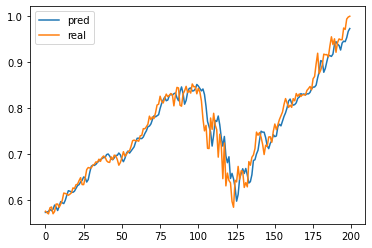

In [555]:
pred.plot()

In [556]:
pred['err'] = pred['pred'] - pred['real']

In [557]:
pred.describe()

,pred,real,err
count,200.000000,200.000000,200.000000
mean,0.749664,0.751861,-0.002197
std,0.098139,0.102829,0.024003
min,0.572552,0.569267,-0.061247
25%,0.681334,0.676774,-0.015384
50%,0.741601,0.744829,-0.003899
75%,0.828838,0.828351,0.006528
max,0.973177,1.000000,0.089654


In [558]:
pred

,pred,real,err
0,0.572552,0.575041,-0.002489
1,0.573125,0.572063,0.001063
2,0.574790,0.569267,0.005523
3,0.579120,0.582722,-0.003602
4,0.576183,0.584342,-0.008159
...,...,...,...
195,0.945662,0.974317,-0.028655
196,0.944605,0.971286,-0.026682
197,0.953368,0.993965,-0.040597
198,0.967196,0.998250,-0.031053


In [564]:
(scaler_Close.inverse_transform(pred))

array([[ 2.20077177e+02,  2.21029999e+02, -1.56789297e-02],
       [ 2.20296777e+02,  2.19889999e+02,  1.34392082e+00],
       [ 2.20933792e+02,  2.18820007e+02,  3.05092731e+00],
       [ 2.22591197e+02,  2.23970001e+02, -4.41661044e-01],
       [ 2.21467052e+02,  2.24589996e+02, -2.18580195e+00],
       [ 2.22775825e+02,  2.18960007e+02,  4.75296111e+00],
       [ 2.26232603e+02,  2.20820007e+02,  6.34973845e+00],
       [ 2.24460355e+02,  2.27009995e+02, -1.61249619e+00],
       [ 2.21653801e+02,  2.27059998e+02, -4.46905389e+00],
       [ 2.25191999e+02,  2.24399994e+02,  1.72914822e+00],
       [ 2.29077689e+02,  2.27029999e+02,  2.98483323e+00],
       [ 2.28090286e+02,  2.30089996e+02, -1.06256749e+00],
       [ 2.27436207e+02,  2.36210007e+02, -7.83665660e+00],
       [ 2.30249560e+02,  2.35869995e+02, -4.68329200e+00],
       [ 2.34495973e+02,  2.35320007e+02,  1.13108816e-01],
       [ 2.38180085e+02,  2.34369995e+02,  4.74723302e+00],
       [ 2.37758747e+02,  2.35279999e+02